# Iris Classification with Neural Networks

In [147]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from cf_matrix import make_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
data = pd.read_csv("iris.data", names=["sepal_width", "sepal_length", "petal_length", "petal_width", "class"])
data

,sepal_width,sepal_length,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Encode the Categorical Classes

Compared to the previous implementation which encoded the data into classes 0, 1 and 2, this implementation attempts to use a One Hot Encoder method. One way to do this is to first encode the classes into 0, 1 and 2. These classes are finally converted into dummies which represents our one hot encoding method.

Another possible way of doing this is to directly use the OneHotEncoder() method which transforms the original array into the dummies.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

> A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value.

In [149]:
# This is one method where we first use the Label Encoder and later convert the labels into binary arrays.

# encoder = LabelEncoder()
# data["class"] = encoder.fit_transform(data["class"])
# dummies = np.array(pd.get_dummies(data["class"], prefix="class"))

encoder = OneHotEncoder()
original_class = pd.DataFrame(data["class"])
encoder.fit(original_class)

dummies = encoder.transform(original_class).toarray()
print(dummies[:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## Split the Dataset Into Train and Test Sets

Similar to the logistic regression implementation, we split the dataset into training and test sets with a 80/20 split. Note that we should also keep in mind to shuffle the dataset due to ordered nature of the data.

In [150]:
X = np.array(data[data.columns[0:4]])
# We can take the dummies array since it's the hot encoded array.
y = dummies

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (120, 4)
Test set shape: (30, 4)


## Scale the Data

Feature scaling normalizes the range of our independent variables or features of our data. This is essential in neural networks/deep learning because it can be sensitive to unnormalized features. This also helps us to speed up our optimization problem and have a more accurate classifier. The method below uses the `StandardScaler()` method provided by sklearn. 

To verify the effects of feature scaling, we can also plot the values. The observed property should theoretically be that the features will have a mean of zero and a deviation of one. For visualization, we use the `kdeplot()` method below which is the Kernel Density Estimate (KDE) plot. This represents the data using a continuous probability density curve.

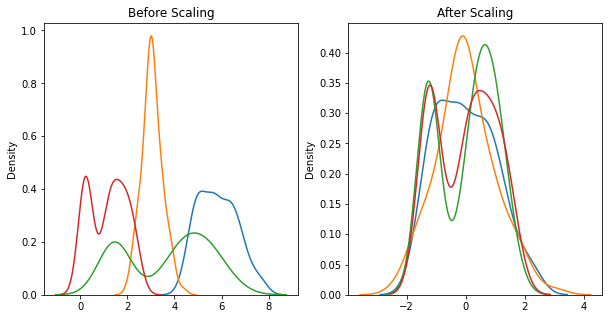

In [151]:
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.fit_transform(X_test)

# Visualization of Before and After Mean Normalization.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.kdeplot(X_train[:, 0], ax=axes[0])
sns.kdeplot(X_train[:, 1], ax=axes[0])
sns.kdeplot(X_train[:, 2], ax=axes[0])
sns.kdeplot(X_train[:, 3], ax=axes[0])

sns.kdeplot(X_train_normalized[:, 0], ax=axes[1])
sns.kdeplot(X_train_normalized[:, 1], ax=axes[1])
sns.kdeplot(X_train_normalized[:, 2], ax=axes[1])
sns.kdeplot(X_train_normalized[:, 3], ax=axes[1])

axes[0].set_title('Before Scaling')
axes[1].set_title('After Scaling')

plt.show()

We can see from the plot that the mean of the variables are now roughly 0 after normalization.

## Neural Network with Scikit-Learn

The architecture of the neural network implemented is a 3 layer neural network with 1 input layer, 1 hidden layer and 1 output layer. This is further broken down into 4 input units corresponding to the 4 features in the dataset, 10 hidden units just... because (it was also found to be the most optimal) and 3 output units.

This first implementation uses the `MLPClassifier()` class provided in Scikit-Learn. The classifier below uses a Stochastic Gradient Descent solver with the default relu activation function. I believe there could be ways to improve the implementation by tweaking the hyperparameters.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [152]:
mlp = MLPClassifier(hidden_layer_sizes=(10), solver='sgd', learning_rate_init= 0.01, max_iter=800)
mlp.fit(X_train_normalized, y_train)

MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=800,
              solver='sgd')

## Predictions and Metrics

We once again use the method of calculating the accuracy, obtaining the classification report and visualizing the confusion matrix. The only catch is that with one hot encoding, the output of our model would only be in a binary array format. Hence, we use the `argmax()` method to obtain the actual predictions of the model to be used to make an array-based confusion matrix. This array is then passed to a visualization method to make a pretty final output.

Credits to DTrimarchi10 for the visualization method: https://github.com/DTrimarchi10/confusion_matrix

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
 Versicolour       0.80      1.00      0.89        12
   Virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.93      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



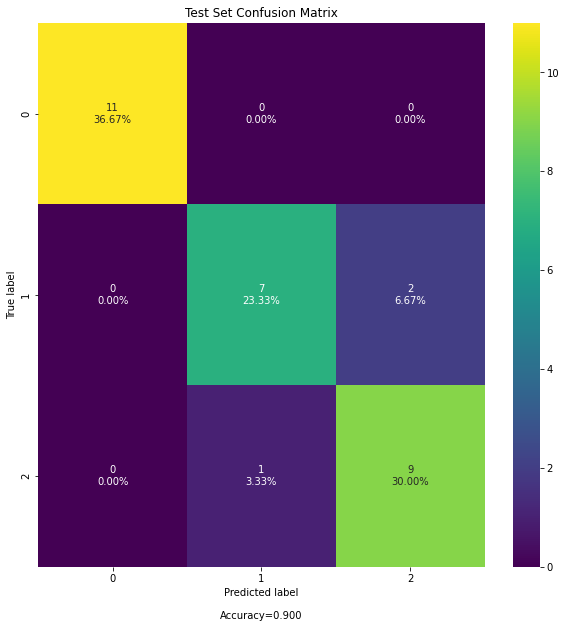

In [158]:
# Prediction and Validation
y_pred_predictions = np.argmax(mlp.predict(X_test_normalized), axis=1)
y_test_predictions = np.argmax(y_test, axis=1)

original_labels = ["Setosa", "Versicolour", "Virginica"]

test_report = classification_report(y_test_predictions, y_pred_predictions, target_names=original_labels)
print(test_report)

test_matrix = confusion_matrix(y_pred_predictions, y_test_predictions)
make_confusion_matrix(matrix, figsize=(10,10), cmap="viridis", title="Test Set Confusion Matrix")